# Names: 
Julia Krumgant 40566465, Diana Lee 28950384, Pranav Mehta 19184282, Kaylee ...

# Question 1

Your goal is to determine the smallest amount of money you need now, which is sufficient to
guarantee the payment streams mandated by the court. Indicate how this amount of money
today will be used each year so as to meet these requirements, justified by an algebraic
formulation of the problem and then a solution via Python/Gurobi. Discuss your solution.

---

## Algebraic formulation of the problem

### Variable:
- \( payment$_{i}$ \): Amount in actual dollars needed to pay at the beginning of year \( i \) (for \( i = 0 \) to \( 14 \)).

### Decision Variables:
- \( x$_{1}$ \): Units of Bond 1 purchased at year 0
- \( x$_{2}$ \): Units of Bond 2 purchased at year 0
- \( s$_{i}$ \): Amount put in the savings account at the beginning of year \( i \) (for \( i = 0 \) to \( 14 \)).


### Objective Function:
Minimize the initial total amount needed at year 0:
$$
\text{Minimize: } 980x_1 + 965x_2 + s_0 + \text{payment}_0\\
$$

### Constraints:


1. **Years 1-4**:

 _For \( i = 1 \) to \( 4 \):_
$$
60x_1 + 65x_2 + 1.04s_{i-1} - s_i \geq \text{payment}_i
$$

2. **Year 5 (Bond 1 matures)**:
$$
60x_1 + 65x_2 + 1000x_1 + 1.04s_4 - s_5 \geq 17000
$$

3. **Years 6-11**:

 _For \( i = 6 \) to \( 11 \):_
$$
65x_2 + 1.04s_{i-1} - s_i \geq \text{payment}_i
$$

4. **Year 12 (Bond 2 matures)**:
$$
65x_2 + 1000x_2 + 1.04s_{11} - s_{12} \geq 31000
$$

5. **Years 13-14**:

 _For \( i = 13 \) to \( 14 \):_
$$
1.04s_{i-1} - s_i \geq \text{payment}_i
$$

### Non-negativity Constraints:
$$
x_1, x_2, s_i \geq 0 \text{ for all } i
$$





In [4]:
import gurobipy as gp
from gurobipy import GRB

# Create a new model
model = gp.Model("Lawsuit Cash Flow")

# Decision variables
x1 = model.addVar(name="Bond1")
x2 = model.addVar(name="Bond2")
s = [model.addVar(name=f"Savings_{i}") for i in range(15)]

# Payments (in actual dollars)
payments = [10000, 11000, 12000, 14000, 15000, 17000, 19000, 20000, 22000, 24000, 26000, 29000, 31000, 33000, 36000]

# Objective function
model.setObjective(980*x1 + 965*x2 + s[0] + payments[0], GRB.MINIMIZE)

# Constraints

# Years 1-4
for i in range(1, 5):
    model.addConstr(60*x1 + 65*x2 + 1.04*s[i-1] - s[i] >= payments[i])

# Year 5 (Bond 1 matures)
model.addConstr(60*x1 + 65*x2 + 1000*x1 + 1.04*s[4] - s[5] >= payments[5])

# Years 6-11
for i in range(6, 12):
    model.addConstr(65*x2 + 1.04*s[i-1] - s[i] >= payments[i])

# Year 12 (Bond 2 matures)
model.addConstr(65*x2 + 1000*x2 + 1.04*s[11] - s[12] >= payments[12])

# Years 13-14
for i in range(13, 15):
    model.addConstr(1.04*s[i-1] - s[i] >= payments[i])

#non-negativity constraint
model.addConstr(x1>=0,"NonNegativityx1")
model.addConstr(x2>=0,'NonNegativityx2')
model.addConstrs((s[i]>=0 for i in range(15)), name='non_negativity_s')

# Optimize model
model.optimize()

# Print results
print(f"Optimal initial investment: ${model.objVal:.2f}")
print(f"Investment in Bond 1: ${x1.x * 980:.2f}")
print(f"Investment in Bond 2: ${x2.x * 965:.2f}")
print(f"Initial investment in Savings: ${s[0].x:.2f}")
print("\nDetailed breakdown:")
print(f"Number of Bond 1 units: {x1.x:.4f}")
print(f"Number of Bond 2 units: {x2.x:.4f}")
for i, sv in enumerate(s):
    print(f"Savings at start of year {i}: ${sv.x:.2f}")

print("\nYearly cash flows:")
for year in range(15):
    if year == 0:
        cash_inflow = 980*x1.x + 965*x2.x + s[0].x
    elif year < 5:
        cash_inflow = 60*x1.x + 65*x2.x + 1.04*s[year-1].x
    elif year == 5:
        cash_inflow = 60*x1.x + 65*x2.x + 1000*x1.x + 1.04*s[year-1].x
    elif year < 12:
        cash_inflow = 65*x2.x + 1.04*s[year-1].x
    elif year == 12:
        cash_inflow = 65*x2.x + 1000*x2.x + 1.04*s[year-1].x
    else:
        cash_inflow = 1.04*s[year-1].x
    
    print(f"Year {year}:")
    print(f"  Cash inflow: ${cash_inflow:.2f}")
    print(f"  Payment made: ${payments[year]:.2f}")
    print(f"  Remaining (put in savings): ${s[year].x:.2f}")
    print()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-08-31
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700H, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 31 rows, 17 columns and 62 nonzeros
Model fingerprint: 0x15ab3e70
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [1e+00, 1e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 4e+04]
Presolve removed 19 rows and 3 columns
Presolve time: 0.00s
Presolved: 12 rows, 14 columns, 40 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e+04   1.796586e+04   0.000000e+00      0s
       5    1.9568367e+05   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.956836732e+05
Optimal initial investment

### Discussion of Q1:

We aim to minimize the total initial amount required at the start of year 0, which includes a payment of `$10 000` dollars, as well as the total investments in Bond 1, Bond 2 and the savings account. The optimal investment strategy involves allocating `$93 879.86` dollars to Bond 1, `$86 999.32` dollars to Bond 2, and `$4 804.50` dollars to the savings account in year 0. The objective value is `$195 683.67` dollars, representing the minimum required amount to guarantee the payment streams mandated by the court . These optimal decisions ensure that all necessary payments are made in a timely manner, with no surplus funds remaining after all obligations have been fulfilled. The output also provides a detailed breakdown of the cash inflows, scheduled payments, and the remaining balance in the savings account.

# Question 2a)

Formulate a linear programming model to determine a treatment plan for the patient.Clearly state what the decision variables are, along with the objective and constraints, in an algebraic formulation.

---

## Algebraic formulation of the problem

### Decision Variables:
- \( x$_{1}$ \): Dose from beam 1 in kilorad
- \( x$_{2}$ \): Dose from beam 2 in kilorad

### Objective Function:
Minimize the dosage to healthy anatomy: 
$$
\text{Minimize: } 0.4x_1 + 0.5x_2 \\
$$

### Constraints:
Subject to:

1.Dosage to critical tissues should not exceed 2.7 kilorads:
$$
0.3x_1 + 0.1x_2 \leq 2.7
$$

2.Dosage to the center of tumor should be at least 6 kilorads:
$$
0.6x_1 + 0.4x_2 \geq 6
$$

### Non-negativity Constraints:
$$
x_1, x_2 \geq 0 \
$$

# Question 2 - b)
Use Python/Gurobi to determine the optimal decisions and optimal objective function.State the results in plain language.

In [8]:
from gurobipy import Model, GRB

# Initialize model
m = Model("RadiationTherapy")

# Decision Variables
x1 = m.addVar(vtype=GRB.CONTINUOUS, name="x1")  # Dose from Beam 1
x2 = m.addVar(vtype=GRB.CONTINUOUS, name="x2")  # Dose from Beam 2

# Objective Function: Minimize the dosage to healthy anatomy
m.setObjective(0.4*x1 + 0.5*x2, GRB.MINIMIZE)

# Constraints
# Dosage to critical tissues should not exceed 2.7 kilorads
m.addConstr(0.3*x1 + 0.1*x2 <= 2.7, "CriticalTissues")

# Dosage to the center of tumor should be at least 6 kilorads
m.addConstr(0.6*x1 + 0.4*x2 >= 6, "TumorCenter")

# Non-negativity constraints
m.addConstr(x1 >= 0, "NonNegX1")
m.addConstr(x2 >= 0, "NonNegX2")

# Optimize model
m.optimize()

# Print the results
if m.status == GRB.OPTIMAL:
    print("Optimal solution found!")
    print(f"Beam 1 dose (x1) = {x1.x:.2f} kilorads")
    print(f"Beam 2 dose (x2) = {x2.x:.2f} kilorads")
    print(f"Objective value (dosage to healthy anatomy) = {m.objVal:.2f} kilorads")
else:
    print("No optimal solution found.")


Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700H, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 4 rows, 2 columns and 6 nonzeros
Model fingerprint: 0x54478d7b
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [4e-01, 5e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 6e+00]
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.3494167e+00   3.005000e-01   0.000000e+00      0s
       1    4.7000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds (0.00 work units)
Optimal objective  4.700000000e+00
Optimal solution found!
Beam 1 dose (x1) = 8.00 kilorads
Beam 2 dose (x2) = 3.00 kilorads
Objective value (dosage to healthy

## Explain the outputs of the code above:

By running the code above, the output shows that the optimal decisions are 8 kilorads from Beam 1 and 3 kilorads from Beam 2. The objective value, which is the dosage to healthy anatomy is 4.7 kilorads.

# Question 2c)
Now suppose the doctors want to understand the tradeoffs between the objective of
minimizing the total dosage delivered to the healthy anatomy and an objective of
delivering as much total dosage to the center of the tumor (keeping the <= 2.7 kilorads
to the critical issues as a hard constraint). Create the Pareto optimal tradeoff curve for
these two objectives and explain it in plain language. Explain how you constructed the
curve.

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700H, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 3 rows, 2 columns and 4 nonzeros
Model fingerprint: 0xc5353753
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [4e-01, 6e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 3e+00]
Presolve removed 3 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.0800000e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective -1.080000000e+01
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700H, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical c

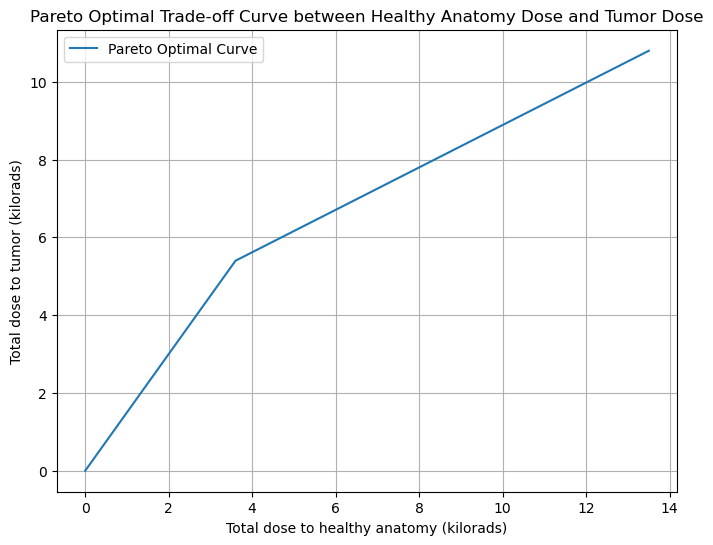

In [11]:
from gurobipy import Model, GRB
import numpy as np
import matplotlib.pyplot as plt

# Function to solve the linear program with a weighted objective for Pareto curve
def optimize_radiation(alpha):
    # Initialize model
    m = Model("RadiationTherapy")

    # Decision Variables
    x1 = m.addVar(vtype=GRB.CONTINUOUS, name="x1")  # Dose from Beam 1
    x2 = m.addVar(vtype=GRB.CONTINUOUS, name="x2")  # Dose from Beam 2

    # Weighted Objective Function:
    # alpha * (healthy anatomy dose) + (1 - alpha) * (tumor dose)
    m.setObjective(alpha * (0.4 * x1 + 0.5 * x2) - (1 - alpha) * (0.6 * x1 + 0.4 * x2), GRB.MINIMIZE)

    # Constraints
    # Dosage to critical tissues should not exceed 2.7 kilorads
    m.addConstr(0.3 * x1 + 0.1 * x2 <= 2.7, "CriticalTissues")

    # No minimum tumor constraint for this part (as we start from 0,0 and grow)
    # Non-negativity constraints
    m.addConstr(x1 >= 0, "NonNegX1")
    m.addConstr(x2 >= 0, "NonNegX2")

    # Optimize model
    m.optimize()

    if m.status == GRB.OPTIMAL:
        healthy_anatomy_dose = 0.4 * x1.x + 0.5 * x2.x
        tumor_dose = 0.6 * x1.x + 0.4 * x2.x
        return healthy_anatomy_dose, tumor_dose
    else:
        return None, None

# Generate Pareto curve by varying alpha
alpha_values = np.linspace(0, 1, 100)
pareto_front = []

for alpha in alpha_values:
    healthy_anatomy_dose, tumor_dose = optimize_radiation(alpha)
    if healthy_anatomy_dose is not None and tumor_dose is not None:
        pareto_front.append((healthy_anatomy_dose, tumor_dose))

# Convert Pareto front to numpy array for easier plotting
pareto_front = np.array(pareto_front)

# Plot the Pareto front
plt.figure(figsize=(8, 6))
plt.plot(pareto_front[:, 0], pareto_front[:, 1], label="Pareto Optimal Curve")
plt.xlabel('Total dose to healthy anatomy (kilorads)')
plt.ylabel('Total dose to tumor (kilorads)')
plt.title('Pareto Optimal Trade-off Curve between Healthy Anatomy Dose and Tumor Dose')
plt.grid(True)
plt.legend()
plt.savefig("2c_pm")
plt.show()


In [12]:
#Optimal decisions / Coordinates on the graph
pareto_front

array([[13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [13.5, 10.8],
       [ 3.6,  5.4],
       [ 3.6,  5.4],
       [ 3.6,  5.4],
       [ 3.6,  5.4],
       [ 3.6,  5.4],
       [ 3.6,  5.4],
       [ 3.6,  5.4],
       [ 3.6,  5.4],
       [ 3.6,  5.4],
       [ 3.6,  5.4],
       [ 3.6,  5.4],
       [ 3.6,  5.4],
       [ 3.6,

#### ANSWER:

To create the Pareto optimal tradeoff curve, we used a code that looks at the trade-off between reducing radiation to healthy anatomy and increasing radiation to the tumor. It uses an objective function `optimize_radiation` that calculates doses from the two different radiation beams. The objective function changes based on a value called alpha, which ranges from 1 to 0 (alpha determines the portion of the objective function focused on minimizing the dose delivered to healthy anatomy, while 1-alpha focuses on the tumor). This helps find a good balance of radiation doses. 

The constraint `CriticalTissues` makes sure that radiation to critical tissues is within a safe limit of 2.7 kilorads. When the model finds an optimal solution `(m.status == GRB.OPTIMAL)`, it calculates the doses for both healthy anatomy and the tumor. If an optimal solution isn't found, it returns None, meaning no points can be added to the Pareto optimal tradeoff curve. Valid solutions are stored in a list called `pareto_front` for plotting the trade-off curve.

Each point on the curve represents an optimal trade-off between radiation doses. By examining the `pareto_front` list, we find that for all values of alpha that lead to the solution x$_{1}$=13.5 and x$_{2}$=10.8, the slope of the curve remains consistent, reflecting the same shadow price. Similarly, for all alpha values that lead to the solution x$_{1}$=3.6 and x$_{2}$=5.4.